In [1]:
# Практична робота №2 з предмету: "Машине Навчання". Студента: Золотухіна Віктора Ігоровича. Варіант 8

# 1.Виведіть перші 5 рядків таблиці.
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

table = tables[2]

print(table.head(5))

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


In [3]:
# 2.Визначте кількість рядків і стовпчиків за допомогою атрибуту shape
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
tables = pd.read_html(url, header=0)

data = tables[2]

shape = data.shape
print("Кількість рядків і стовпців:", shape)

Кількість рядків і стовпців: (32, 5)


In [4]:
# 3.Визначте загальну кількість років та кількість місяців у даних.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)

tables = pd.read_html(response.text)

data = tables[2]

data = data.dropna(how='all').dropna(axis=1, how='all')

num_rows, num_cols = data.shape
total_years = num_cols - 1
total_months = num_rows - 1

print(f"Загальна кількість років: {total_years}")
print(f"Загальна кількість місяців: {total_months}")

Загальна кількість років: 4
Загальна кількість місяців: 31


In [5]:
# 4.Замінити пропущені значення «-» в таблиці на NaN
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
response = requests.get(url)
tables = pd.read_html(response.text)

data = tables[2]

data = data.replace('—', np.nan)

print(data.head())

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  


In [6]:
# 5.Визначити тип стовпців за допомогою dtypes.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

column_types = data.dtypes

print(column_types)

Рік                                           object
В національній валюті                         object
В доларах США                                 object
Кількість кг хліба[20] на середню зарплату    object
Кількість БігМаків на середню зарплату        object
dtype: object


In [7]:
# 6.Видаліть передостанній і останній стовпчики ( Кількість кгхліба[20] на середнюзарплату, Кільксть БігМаків на середню зарплату). Далі працюйте з оновленою таблицею.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

data = data.iloc[:, :-2]

print(data)

      Рік В національній валюті В доларах США
0    1992              5832,88▲        28,04▼
1    1993               163533▲        36,03▲
2    1994              1426343▲        44,99▲
3    1995              7304000▲        49,53▲
4    1996               125,23▼        68,45▲
5    1997               143,09▲        76,86▲
6    1998               152,83▲        62,39▼
7    1999               177,39▲        42,95▼
8    2000               231,04▲        42,47▼
9    2001               311,62▲        58,01▲
10   2002               375,98▲        70,59▲
11   2003               462,58▲        86,74▲
12   2004               590,53▲       111,02▲
13   2005               806,14▲       157,30▲
14   2006              1042,88▲       206,51▲
15   2007              1352,75▲       267,87▲
16   2008              1808,92▲       343,43▲
17   2009              1909,25▲       245,05▼
18   2010              2246,75▲       283,12▲
19   2011              2639,17▲       331,24▲
20   2012              3031,92▲   

In [8]:
# 7.Замінити тип нечислових даних на числові.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

data = data.iloc[:, :-2]

def try_convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return value

for column in data.columns:
    data[column] = data[column].apply(try_convert_to_float)

print(data)

       Рік В національній валюті В доларах США
0   1992.0              5832,88▲        28,04▼
1   1993.0               163533▲        36,03▲
2   1994.0              1426343▲        44,99▲
3   1995.0              7304000▲        49,53▲
4   1996.0               125,23▼        68,45▲
5   1997.0               143,09▲        76,86▲
6   1998.0               152,83▲        62,39▼
7   1999.0               177,39▲        42,95▼
8   2000.0               231,04▲        42,47▼
9   2001.0               311,62▲        58,01▲
10  2002.0               375,98▲        70,59▲
11  2003.0               462,58▲        86,74▲
12  2004.0               590,53▲       111,02▲
13  2005.0               806,14▲       157,30▲
14  2006.0              1042,88▲       206,51▲
15  2007.0              1352,75▲       267,87▲
16  2008.0              1808,92▲       343,43▲
17  2009.0              1909,25▲       245,05▼
18  2010.0              2246,75▲       283,12▲
19  2011.0              2639,17▲       331,24▲
20  2012.0   

C:\Users\vitya\AppData\Local\Temp\ipykernel_15628\2281672180.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(try_convert_to_float)
C:\Users\vitya\AppData\Local\Temp\ipykernel_15628\2281672180.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(try_convert_to_float)
C:\Users\vitya\AppData\Local\Temp\ipykernel_15628\2281672180.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [9]:
# 8.Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len)
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

data = data.iloc[:, :-2]

total_rows = len(data)

missing_counts = data.isnull().sum()

missing_fraction = missing_counts / total_rows

print("Частка пропусків в кожній колонці:")
print(missing_fraction)

Частка пропусків в кожній колонці:
Рік                      0.0
В національній валюті    0.0
В доларах США            0.0
dtype: float64


In [10]:
# 9.Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

data = data.iloc[:, :-2]

numerical_columns = [col for col in data.columns if col != 'Рік']
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.str.replace('[^0-9.]', '', regex=True).str.replace(',', '.', regex=False).str.rstrip('▲▼').replace('..', np.nan).astype(float) if x.name != 'Рік' else x)

max_salary_year = data[numerical_columns].max(axis=1).idxmax()
max_salary = data.loc[max_salary_year, 'Рік']

print(f"Рік з найвищою середньорічною зарплатою в Україні: {max_salary} рік")

Рік з найвищою середньорічною зарплатою в Україні: 1995 рік


C:\Users\vitya\AppData\Local\Temp\ipykernel_15628\1629142386.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = data[numerical_columns].apply(lambda x: x.str.replace('[^0-9.]', '', regex=True).str.replace(',', '.', regex=False).str.rstrip('▲▼').replace('..', np.nan).astype(float) if x.name != 'Рік' else x)


In [11]:
# 10.Знайдіть рік з мінімальною зарплатою в Україні в дол. США і вкажіть цю зарплату.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

data = data.iloc[:, :-2]

numerical_columns = [col for col in data.columns if col != 'Рік']
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.str.replace('[^0-9.]', '', regex=True).str.replace(',', '.', regex=False).str.rstrip('▲▼').replace('..', np.nan).astype(float) if x.name != 'Рік' else x)

min_salary_year = data[numerical_columns].min(axis=1).idxmin()
min_salary_usd = data.loc[min_salary_year, 'Рік']

print(f"Рік з мінімальною середньорічною зарплатою в Україні в доларах США: {min_salary_usd} рік")

Рік з мінімальною середньорічною зарплатою в Україні в доларах США: 1992 рік


C:\Users\vitya\AppData\Local\Temp\ipykernel_15628\1504324036.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = data[numerical_columns].apply(lambda x: x.str.replace('[^0-9.]', '', regex=True).str.replace(',', '.', regex=False).str.rstrip('▲▼').replace('..', np.nan).astype(float) if x.name != 'Рік' else x)


In [12]:
# 11.Виведіть роки, коли зарплата в грн була вище середньої.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

data = data.iloc[:, :-2]

numerical_columns = [col for col in data.columns if col != 'Рік']
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.str.replace('[^0-9.]', '', regex=True).str.replace(',', '.', regex=False).str.rstrip('▲▼').replace('..', np.nan).astype(float) if x.name != 'Рік' else x)

average_salary_gryvna = data[numerical_columns].mean(axis=1)

years_above_average = data.loc[average_salary_gryvna > average_salary_gryvna.mean(), 'Рік']

print("Роки, коли зарплата в гривнях була вище середньої:")
print(years_above_average)

Роки, коли зарплата в гривнях була вище середньої:
2      1994
3      1995
25     2017
26     2018
27     2019
28     2020
29     2021
30    2022*
31    2023*
Name: Рік, dtype: object


C:\Users\vitya\AppData\Local\Temp\ipykernel_15628\1952009927.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = data[numerical_columns].apply(lambda x: x.str.replace('[^0-9.]', '', regex=True).str.replace(',', '.', regex=False).str.rstrip('▲▼').replace('..', np.nan).astype(float) if x.name != 'Рік' else x)


In [13]:
# 12.Порівняйте зарплату в грн за останні два доступних роки.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

data = data.iloc[:, :-2]

numerical_columns = [col for col in data.columns if col != 'Рік']
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.str.replace('[^0-9.]', '', regex=True).str.replace(',', '.', regex=False).str.rstrip('▲▼').replace('..', np.nan).astype(float) if x.name != 'Рік' else x)

average_salary_gryvna = data[numerical_columns].mean(axis=1)

latest_two_years_data = data.iloc[-2:, -2:]

print("Зарплата в гривнях за останні два доступних роки:")
print(latest_two_years_data)

Зарплата в гривнях за останні два доступних роки:
    В національній валюті  В доларах США
30              1337621.0        38000.0
31              1376840.0        35872.0


C:\Users\vitya\AppData\Local\Temp\ipykernel_15628\624043873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = data[numerical_columns].apply(lambda x: x.str.replace('[^0-9.]', '', regex=True).str.replace(',', '.', regex=False).str.rstrip('▲▼').replace('..', np.nan).astype(float) if x.name != 'Рік' else x)


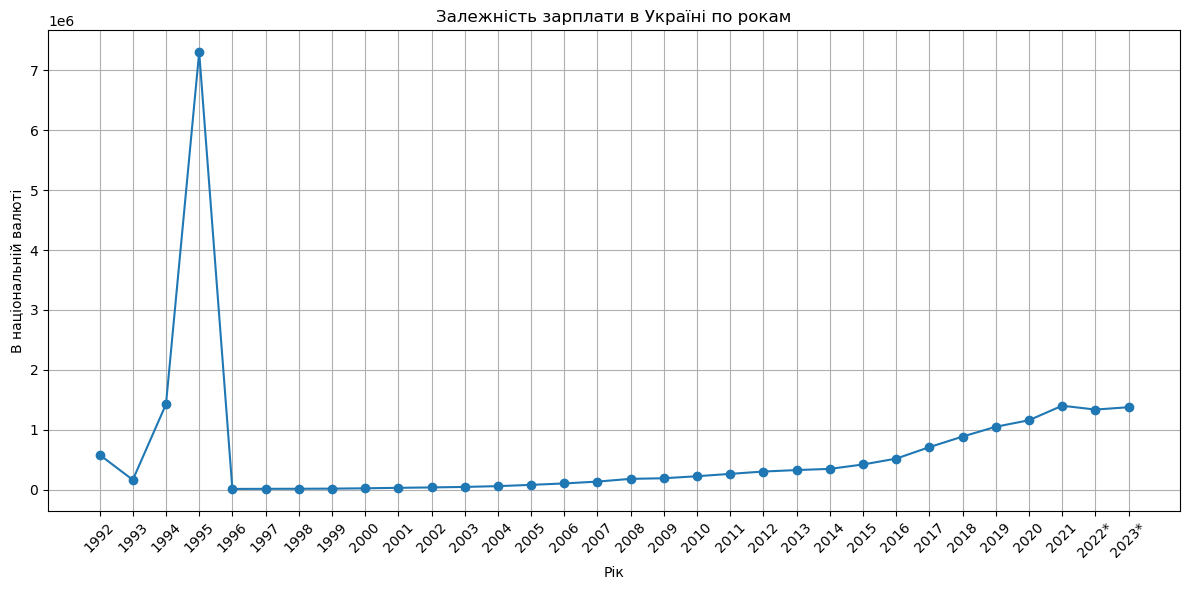

In [14]:
# 13.Створіть графік, що відображає зарплату в Україні з часом (за роками).
years = data['Рік']
salary_in_uah = data['В національній валюті']

plt.figure(figsize=(12, 6))
plt.plot(years, salary_in_uah, marker='o', linestyle='-')

plt.title('Залежність зарплати в Україні по рокам')
plt.xlabel('Рік')
plt.ylabel('В національній валюті')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# 14.Видаліть останній рік з таблиці та виведіть оновлену таблицю.
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

tables = pd.read_html(url)

data = tables[2]

data = data.iloc[:, :-2]

last_year_index = data.index[-1]

data = data.drop(index=last_year_index)

print(data)

      Рік В національній валюті В доларах США
0    1992              5832,88▲        28,04▼
1    1993               163533▲        36,03▲
2    1994              1426343▲        44,99▲
3    1995              7304000▲        49,53▲
4    1996               125,23▼        68,45▲
5    1997               143,09▲        76,86▲
6    1998               152,83▲        62,39▼
7    1999               177,39▲        42,95▼
8    2000               231,04▲        42,47▼
9    2001               311,62▲        58,01▲
10   2002               375,98▲        70,59▲
11   2003               462,58▲        86,74▲
12   2004               590,53▲       111,02▲
13   2005               806,14▲       157,30▲
14   2006              1042,88▲       206,51▲
15   2007              1352,75▲       267,87▲
16   2008              1808,92▲       343,43▲
17   2009              1909,25▲       245,05▼
18   2010              2246,75▲       283,12▲
19   2011              2639,17▲       331,24▲
20   2012              3031,92▲   

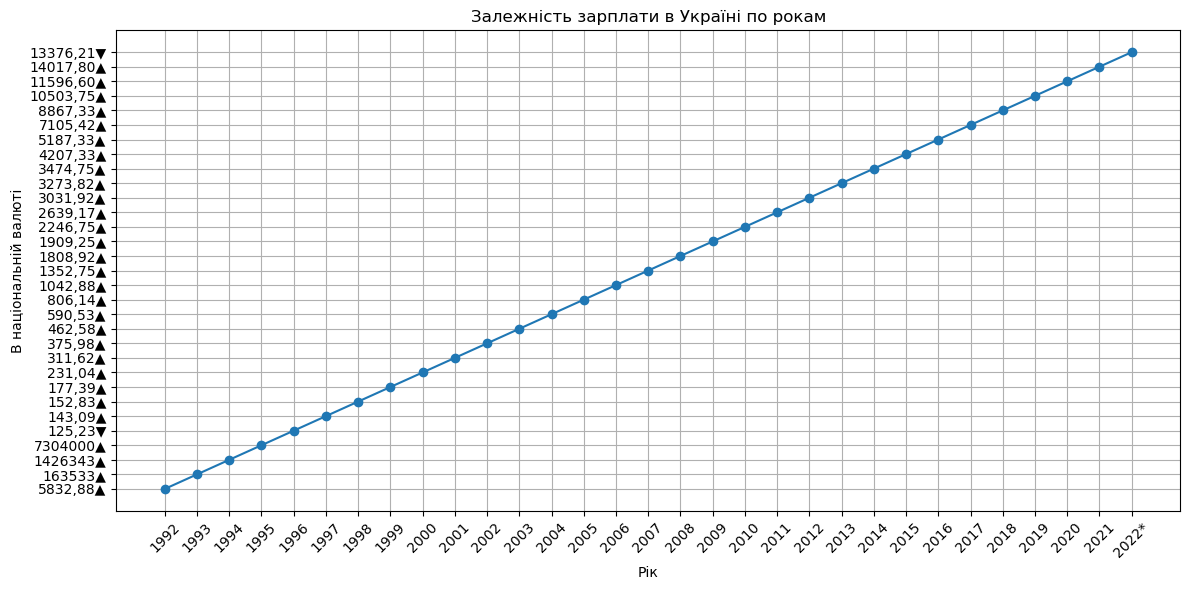

In [16]:
# 15.Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.
years = data['Рік']
salary_in_uah = data['В національній валюті']

plt.figure(figsize=(12, 6))
plt.plot(years, salary_in_uah, marker='o', linestyle='-')

plt.title('Залежність зарплати в Україні по рокам')
plt.xlabel('Рік')
plt.ylabel('В національній валюті')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# 16.Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку.
data['В національній валюті'] = pd.to_numeric(data['В національній валюті'], errors='coerce')

last_two_years_data = data[data['Рік'] >= 2021]
average_salary_last_two_years = last_two_years_data['В національній валюті'].mean()

last_five_years_data = data[data['Рік'] >= 2018]
average_salary_last_five_years = last_five_years_data['В національній валюті'].mean()

if average_salary_last_two_years > average_salary_last_five_years:
    print("Середня зарплата за останні два роки вища, ніж за останні п'ять років.")
    print(f"Різниця: {average_salary_last_two_years - average_salary_last_five_years} грн")
elif average_salary_last_two_years < average_salary_last_five_years:
    print("Середня зарплата за останні два роки нижча, ніж за останні п'ять років.")
    print(f"Різниця: {average_salary_last_five_years - average_salary_last_two_years} грн")
else:
    print("Середня зарплата за останні два роки і за останні п'ять років однакова.")

TypeError: '>=' not supported between instances of 'str' and 'int'